In [5]:
from PIL import Image
from numpy import *
from pylab import *
import ransac
import sift
from PIL import Image
import homography
import warp

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [4]:
featname = ['Univ'+str(i+1)+'.sift' for i in range(5)]
imname = ['Univ'+str(i+1)+'.jpg' for i in range(5)]
l = {}
d = {}
for i in range(5):
    sift.process_image(imname[i],featname[i])
    l[i],d[i] = sift.read_features_from_file(featname[i])
    l[i][:,[0,1]] = l[i][:,[1,0]]
    
matches = {}
for i in range(4):
    matches[i] = sift.match(d[i+1],d[i])

processed tmp.pgm to Univ1.sift
processed tmp.pgm to Univ2.sift
processed tmp.pgm to Univ3.sift
processed tmp.pgm to Univ4.sift
processed tmp.pgm to Univ5.sift


In [6]:
def convert_points(j):
    ndx = matches[j].nonzero()[0]
    fp = homography.make_homog(l[j+1][ndx, :2].T)
    ndx2 = [int(matches[j][i]) for i in ndx]
    tp = homography.make_homog(l[j][ndx2,:2].T)
    return fp, tp

In [7]:
model = homography.RansacModel()

fp, tp = convert_points(1)
H_12 = homography.H_from_ransac(fp, tp, model)[0] #im1 to im2

fp, tp = convert_points(0)
H_01 = homography.H_from_ransac(fp, tp, model)[0] #im0 to im1

tp, fp = convert_points(2)
H_32 = homography.H_from_ransac(fp, tp, model)[0] #im3 to im2

tp, fp = convert_points(3)
H_43 = homography.H_from_ransac(fp, tp, model)[0] #im4 to im3

warp - right
warp - right
warp - left
warp - left


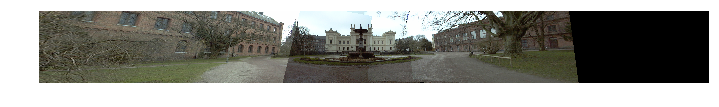

In [50]:
# no brightness adjustment

delta = 2000


im1 = array(Image.open(imname[1]))
im2 = array(Image.open(imname[2]))
im_12 = warp.panorama(H_12, im1, im2, delta, delta)

im1 = array(Image.open(imname[0]))
im_02 = warp.panorama(dot(H_12, H_01), im1, im_12, delta, delta)

im1 = array(Image.open(imname[3]))
im_32 = warp.panorama(H_32, im1, im_02, delta, delta)

im1 = array(Image.open(imname[4]))
im_42 = warp.panorama(dot(H_32, H_43), im1, im_32, delta, 2*delta)
im_42[im_42<0] = 0
im_42[im_42>255] = 255
im_42 = uint8(im_42)

figure(figsize=(12,12))
imshow(uint8(im_42))
axis('off')
show()

warp - right
warp - right
warp - left
warp - left


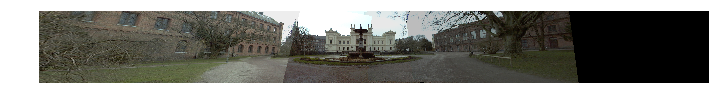

In [82]:
#brightness adjustment

delta = 2000

im0 = array(Image.open(imname[0]))
im1 = array(Image.open(imname[1]))
im2 = array(Image.open(imname[2]))
im3 = array(Image.open(imname[3]))
im4 = array(Image.open(imname[4]))

im2 = im2 * 128.0/(im2.mean())
im1 = im1 * (im2[:, im2.shape[1]/2:]).mean()/(im1[:, :im1.shape[1]/2]).mean()
im0 = im0 * (im1[:, im1.shape[1]/2:]).mean()/(im0[:, :im0.shape[1]/2]).mean()
im3 = im3 * (im2[:, :im2.shape[1]/2]).mean()/(im3[:, im3.shape[1]/2:]).mean()
im4 = im4 * (im3[:, :im3.shape[1]/2]).mean()/(im4[:, im4.shape[1]/2:]).mean()


im_12 = warp.panorama(H_12, im1, im2, delta, delta)
im_02 = warp.panorama(dot(H_12, H_01), im0, im_12, delta, delta)
im_32 = warp.panorama(H_32, im3, im_02, delta, delta)
im_42 = warp.panorama(dot(H_32, H_43), im4, im_32, delta, 2*delta)
im_42[im_42<0] = 0
im_42[im_42>255] = 255
im_42 = uint8(im_42)

figure(figsize=(12,12))
imshow(uint8(im_42))
axis('off')
show()

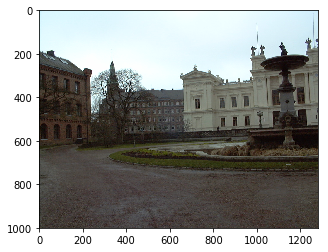

114.426775521


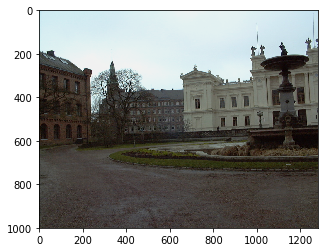

108.479951042


In [78]:
im1 = array(Image.open(imname[3]))
imshow(im1)
show()
print np.average(im1)
im1 = im1*109.0/np.average(im1)
im1[im1<0] = 0
im1[im1>255] =  255
im1 = uint8(im1)
imshow(im1)
show()
print np.average(im1)


In [83]:
print H_43

[[  9.57438759e-01  -2.61759063e-01   5.43108782e+00]
 [  1.46646151e-01   5.18805907e-01   8.97080261e+02]
 [  4.20988606e-05  -3.90321107e-04   1.00000000e+00]]
